# Assignment - Linear Regression
## Problem Statement
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market. 

 

## Business Goal 

- We need to model the price of cars with the available independent variables. 
- It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels.

## Importing & Understanding the data

In [233]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd


car=pd.read_csv('CarPrice_Assignment.csv')
print('Shape of Car dataset : ',car.shape)
print('--------------------------------------------')
print('Data types of columns : ')
print(car.info())
print('--------------------------------------------')
print('Null values in each column of car dataset : \n',round(100*(car.isnull().sum()/len(car.index)), 0))

Shape of Car dataset :  (205, 26)
--------------------------------------------
Data types of columns : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-nu

We can see that there are no null values in any of the columns.

## Data Cleaning

In [234]:
#Deriving the CompanyName from the CarName column as CarName column is a combiantion of company name and car modelss
car['CompanyName']=car['CarName'].str.split(" ",n=1,expand=True)[0]

#Converting CompanyName to uppercase
car['CompanyName']=car['CompanyName'].apply(lambda x:x.upper())

#Droping carName column as we derived required companyname from that column
car=car.drop('CarName',axis=1)

print('Unique values in CompanyName column : \n',car['CompanyName'].unique())

Unique values in CompanyName column : 
 ['ALFA-ROMERO' 'AUDI' 'BMW' 'CHEVROLET' 'DODGE' 'HONDA' 'ISUZU' 'JAGUAR'
 'MAXDA' 'MAZDA' 'BUICK' 'MERCURY' 'MITSUBISHI' 'NISSAN' 'PEUGEOT'
 'PLYMOUTH' 'PORSCHE' 'PORCSHCE' 'RENAULT' 'SAAB' 'SUBARU' 'TOYOTA'
 'TOYOUTA' 'VOKSWAGEN' 'VOLKSWAGEN' 'VW' 'VOLVO']


We can see from above CompanyName list that there are spellings which need to be corrected. For eg: MAXDA and MAZDA, only one of these is correct i.e MAZDA which need to be kept. Similarly for PORSCHE,VOLKSWAGEN,TOYOTA

VW is shortened word for Volkswagen.

In [235]:
#Replacing CompanyNames with correct words.
car['CompanyName']=car['CompanyName'].replace({'MAXDA':'MAZDA','PORCSHCE':'PORSCHE','TOYOUTA':'TOYOTA','VOKSWAGEN':'VOLKSWAGEN','VW':'VOLKSWAGEN'})
print('Unique values in CompanyName column : \n',car['CompanyName'].unique())

Unique values in CompanyName column : 
 ['ALFA-ROMERO' 'AUDI' 'BMW' 'CHEVROLET' 'DODGE' 'HONDA' 'ISUZU' 'JAGUAR'
 'MAZDA' 'BUICK' 'MERCURY' 'MITSUBISHI' 'NISSAN' 'PEUGEOT' 'PLYMOUTH'
 'PORSCHE' 'RENAULT' 'SAAB' 'SUBARU' 'TOYOTA' 'VOLKSWAGEN' 'VOLVO']


## Data Visualisation

#### Visualising categorical variables

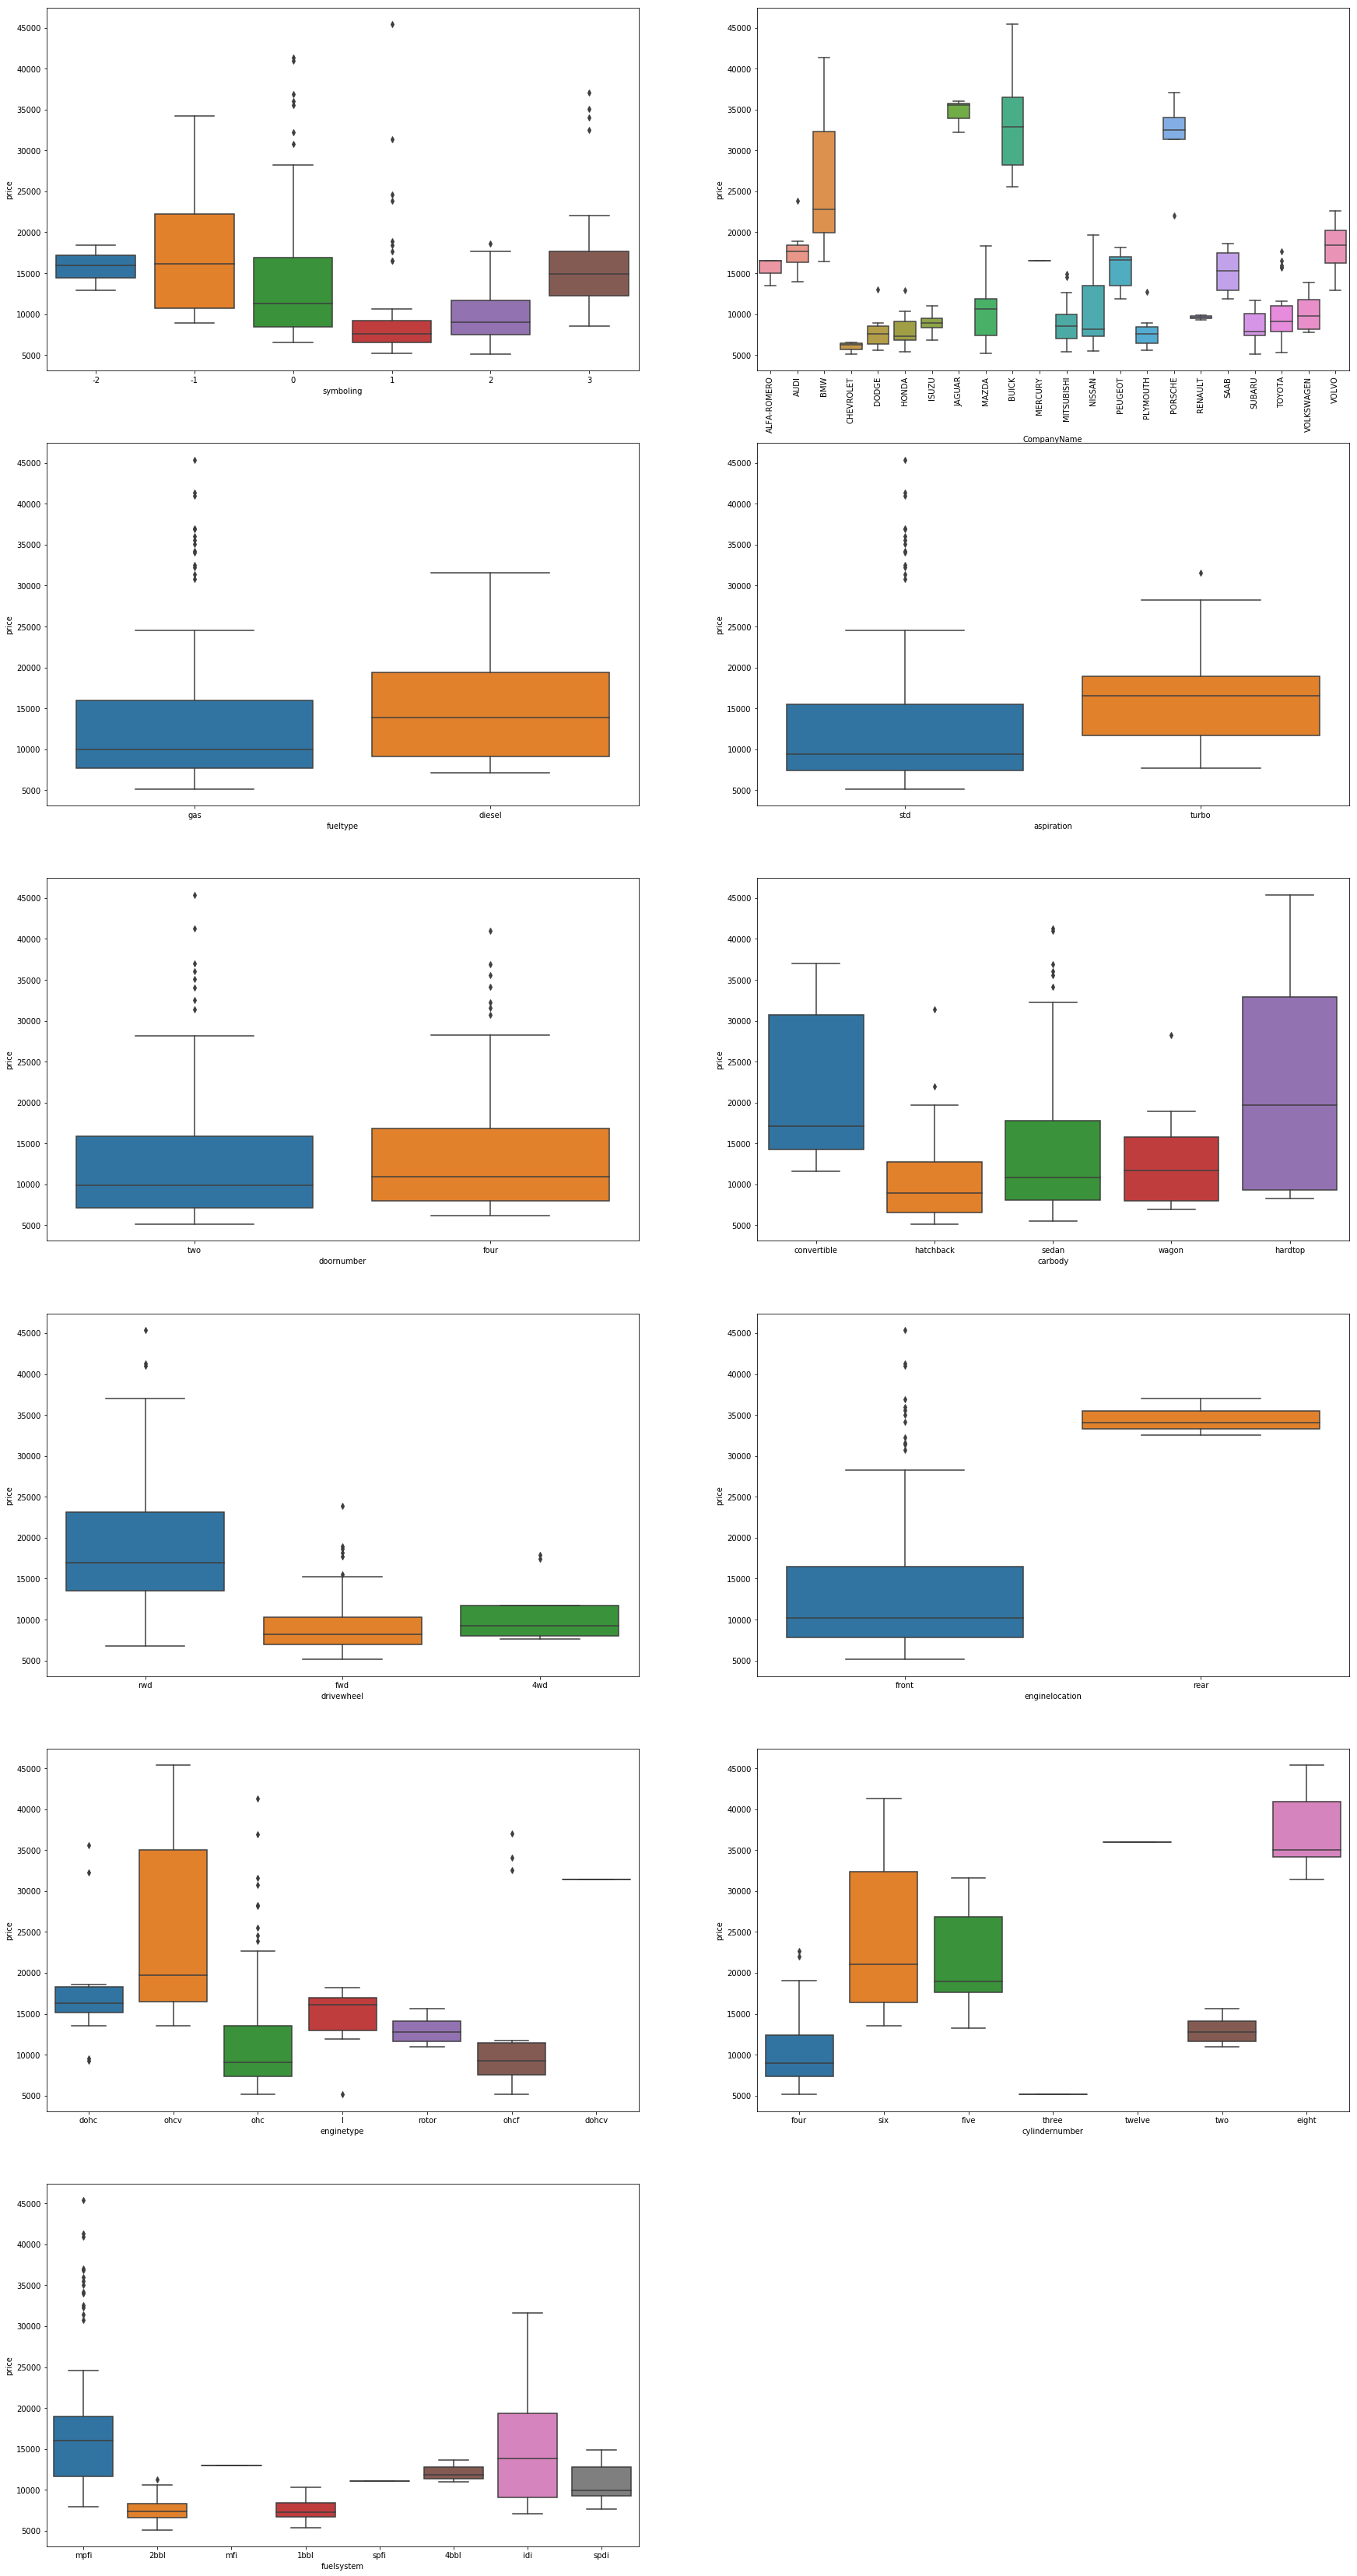

In [236]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(30, 60))
plt.subplot(6,2,1)
sns.boxplot(x = 'symboling', y = 'price', data = car)
plt.subplot(6,2,2)
plt.xticks(rotation=90)
sns.boxplot(x = 'CompanyName', y = 'price', data = car)
plt.subplot(6,2,3)
sns.boxplot(x = 'fueltype', y = 'price', data = car)
plt.subplot(6,2,4)
sns.boxplot(x = 'aspiration', y = 'price', data = car)
plt.subplot(6,2,5)
sns.boxplot(x = 'doornumber', y = 'price', data = car)
plt.subplot(6,2,6)
sns.boxplot(x = 'carbody', y = 'price', data = car)
plt.subplot(6,2,7)
sns.boxplot(x = 'drivewheel', y = 'price', data = car)
plt.subplot(6,2,8)
sns.boxplot(x = 'enginelocation', y = 'price', data = car)
plt.subplot(6,2,9)
sns.boxplot(x = 'enginetype', y = 'price', data = car)
plt.subplot(6,2,10)
sns.boxplot(x = 'cylindernumber', y = 'price', data = car)
plt.subplot(6,2,11)
sns.boxplot(x = 'fuelsystem', y = 'price', data = car)
plt.show()

#### Visualising Numeric variables

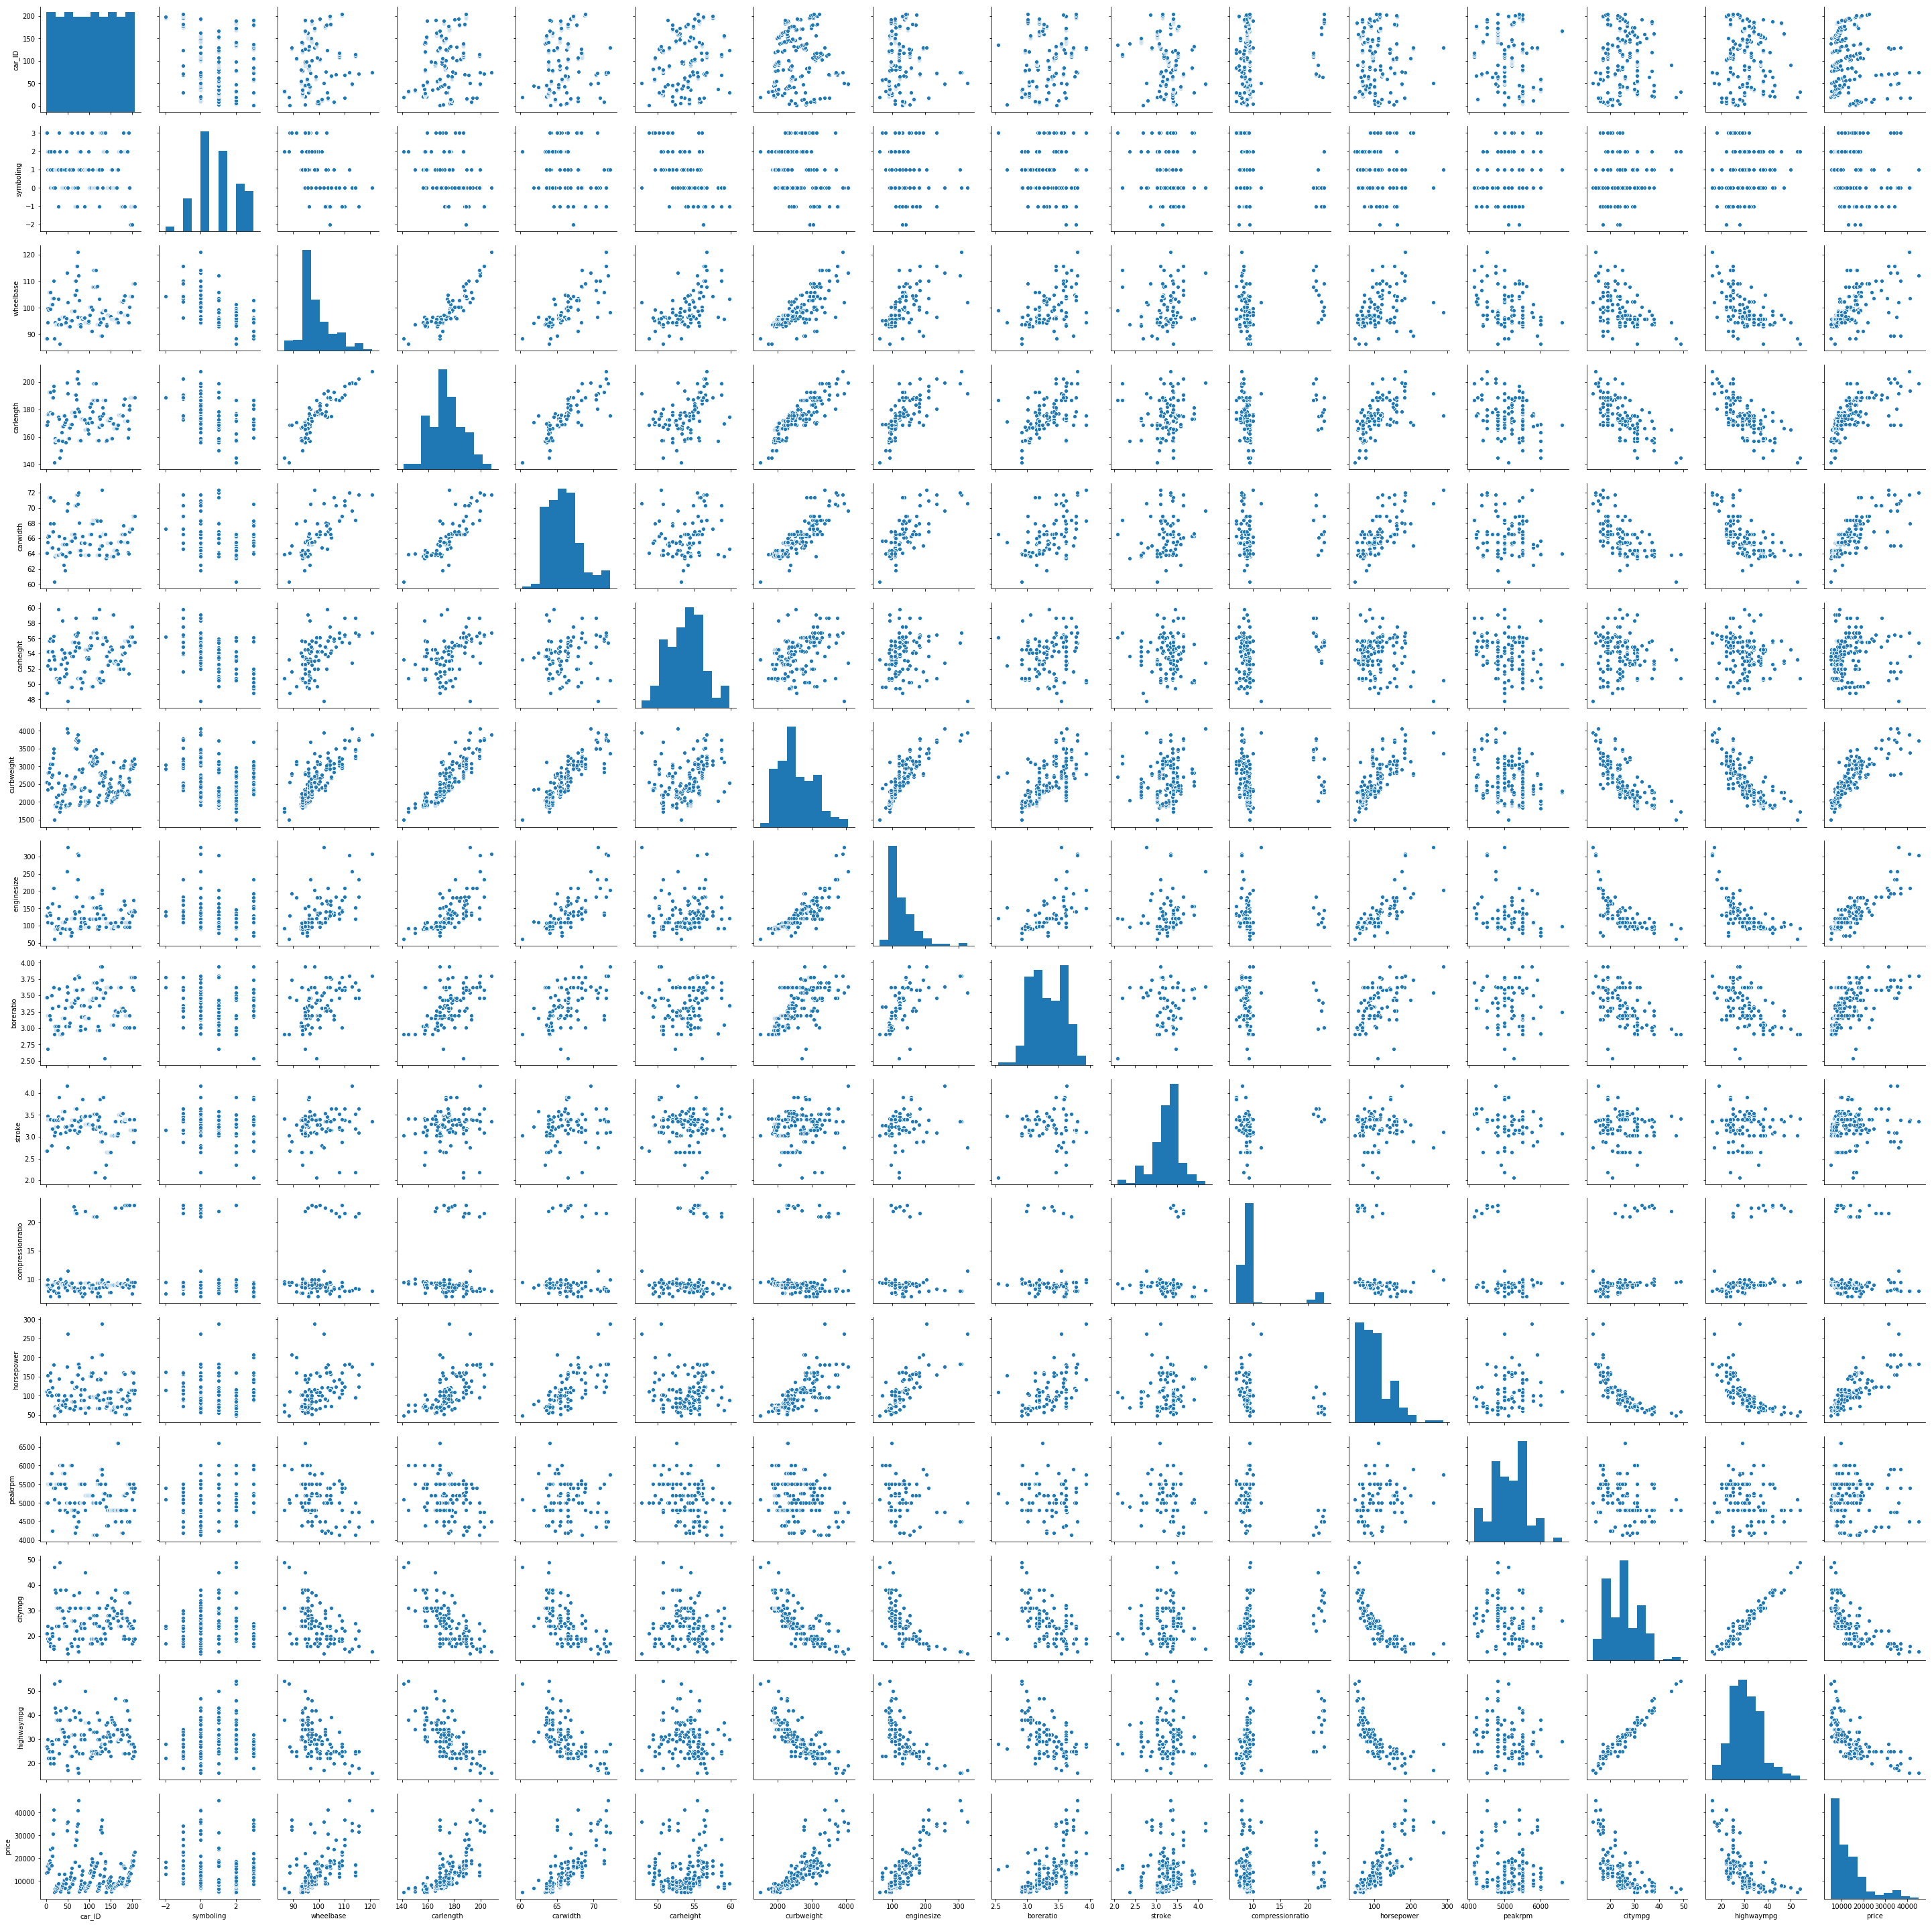

In [237]:
sns.pairplot(car)
plt.show()

## Data Preparation

As we can see few categorical variables,there are columns with 2 distinct values which can be encoded to binary values and can create dummy variables which has more than 2 distinct values.

In [238]:
#Grouping the columns to know which category of the column has high count, to assign 1 to higher and 0 to lower.
print ('Grouping fueltype column : \n',car.groupby(['fueltype']).car_ID.count())
print ('Grouping doornumber column : \n',car.groupby(['doornumber']).car_ID.count())
print ('Grouping enginelocation column : \n',car.groupby(['enginelocation']).car_ID.count())
print ('Grouping aspiration column : \n',car.groupby(['aspiration']).car_ID.count())

Grouping fueltype column : 
 fueltype
diesel     20
gas       185
Name: car_ID, dtype: int64
Grouping doornumber column : 
 doornumber
four    115
two      90
Name: car_ID, dtype: int64
Grouping enginelocation column : 
 enginelocation
front    202
rear       3
Name: car_ID, dtype: int64
Grouping aspiration column : 
 aspiration
std      168
turbo     37
Name: car_ID, dtype: int64


In [239]:
#Based on above count values assigning 1 and 0 to the columns which has 2 distinct values.
car['fueltype']=car['fueltype'].map({'diesel':0,'gas':1})
car['doornumber']=car['doornumber'].map({'two':0,'four':1})
car['enginelocation']=car['enginelocation'].map({'rear':0,'front':1})
car['aspiration']=car['aspiration'].map({'turbo':0,'std':1})

### Dummy Variables



We can see drivewheel column has three levels rwd,fwd and 4wd. For this lets create dummy variables

In [240]:
print ('Grouping drivewheel column : \n',car.groupby(['drivewheel']).car_ID.count())
dummyDW=pd.get_dummies(car['drivewheel']).head()
dummyDW

Grouping drivewheel column : 
 drivewheel
4wd      9
fwd    120
rwd     76
Name: car_ID, dtype: int64


,4wd,fwd,rwd
0,0,0,1
1,0,0,1
2,0,0,1
3,0,1,0
4,1,0,0


We can drop the `4wd` column, as the type of drivewheel can be identified with just the last two columns and the count of 4wd is also less than fwd and rwd.
- `00` will correspond to `4wd`
- `01` will correspond to `rwd`
- `10` will correspond to `fwd`

In [241]:
# Dropping column 4wd from dummyDW df.
dummyDW= pd.get_dummies(car['drivewheel']).drop('4wd',axis=1)

#Adding prefix to the column name 
dummyDW=dummyDW.add_prefix('drivewheel.')
                        
# Adding dummyDW df to car df
car = pd.concat([car, dummyDW], axis = 1)

# Dropping 'drivewheel' columns as we have created the dummies for it
car.drop(['drivewheel'], axis = 1, inplace = True)

In [242]:
print ('Grouping carbody column : \n',car.groupby(['carbody']).car_ID.count())
dummyCB=pd.get_dummies(car['carbody']).head()
dummyCB

Grouping carbody column : 
 carbody
convertible     6
hardtop         8
hatchback      70
sedan          96
wagon          25
Name: car_ID, dtype: int64


,convertible,hardtop,hatchback,sedan,wagon
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0


We can drop the `convertible` column, as the type of carbody can be identified with rest of the columns and the count of convertible is also less compared to other categories.
- `0000` will correspond to `convertible`
- `0001` will correspond to `wagon`
- `0010` will correspond to `sedan`
- `0100` will correspond to `hatchback`
- `1000` will correspond to `harddrop`

In [243]:
# Dropping the column convertible from dummyCB df
dummyCB= pd.get_dummies(car['carbody']).drop('convertible',axis=1)

#Adding prefix to the column name 
dummyCB=dummyCB.add_prefix('carbody.')

# Adding dummyDW df to car df
car = pd.concat([car, dummyCB], axis = 1)

# Dropping 'drivewheel' columns as we have created the dummies for it
car.drop(['carbody'], axis = 1, inplace = True)

In [244]:
print ('Grouping enginetype column : \n',car.groupby(['enginetype']).car_ID.count())
dummyET=pd.get_dummies(car['enginetype']).head(10)
dummyET

Grouping enginetype column : 
 enginetype
dohc      12
dohcv      1
l         12
ohc      148
ohcf      15
ohcv      13
rotor      4
Name: car_ID, dtype: int64


,dohc,dohcv,l,ohc,ohcf,ohcv,rotor
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0
5,0,0,0,1,0,0,0
6,0,0,0,1,0,0,0
7,0,0,0,1,0,0,0
8,0,0,0,1,0,0,0
9,0,0,0,1,0,0,0


We can drop the `dohcv` column, as the this type of enginetype is less in count can be identified using rest of the columns.
- `000000` will correspond to `dohcv`
- `000001` will correspond to `rotor`
- `000010` will correspond to `ohcv`
- `000100` will correspond to `ohcf`
- `001000` will correspond to `ohc`
- `010000` will correspond to `l`
- `100000` will correspond to `dohc`

In [245]:
# Dropping the dohcv column from dummyET df 
dummyET= pd.get_dummies(car['enginetype']).drop('dohcv',axis=1)

#Adding prefix to the column name 
dummyET=dummyET.add_prefix('enginetype.')

# Adding dummyDW df to car df
car = pd.concat([car, dummyET], axis = 1)

# Dropping 'drivewheel' columns as we have created the dummies for it
car.drop(['enginetype'], axis = 1, inplace = True)

In [246]:
print ('Grouping cylinder column : \n',car.groupby(['cylindernumber']).car_ID.count())
dummyCN=pd.get_dummies(car['cylindernumber']).head(10)
dummyCN

Grouping cylinder column : 
 cylindernumber
eight       5
five       11
four      159
six        24
three       1
twelve      1
two         4
Name: car_ID, dtype: int64


,eight,five,four,six,three,twelve,two
0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0
5,0,1,0,0,0,0,0
6,0,1,0,0,0,0,0
7,0,1,0,0,0,0,0
8,0,1,0,0,0,0,0
9,0,1,0,0,0,0,0


We can drop the `twelve` column, as the type of cylinder count is 1 and can be identified using other columns.
- `000000` will correspond to `twelve`
- `000001` will correspond to `two`
- `000010` will correspond to `three`
- `000100` will correspond to `six`
- `001000` will correspond to `four`
- `010000` will correspond to `five`
- `100000` will correspond to `eight`

In [247]:
# Dropping the twelve column  from dummyCN df
dummyCN= pd.get_dummies(car['cylindernumber']).drop('twelve',axis=1)

#Adding prefix to the column name 
dummyCN=dummyCN.add_prefix('cylindernumber.')

# Adding dummyDW df to car df
car = pd.concat([car, dummyCN], axis = 1)

# Dropping 'drivewheel' columns as we have created the dummies for it
car.drop(['cylindernumber'], axis = 1, inplace = True)

In [248]:
print ('Grouping fuelsystem column : \n',car.groupby(['fuelsystem']).car_ID.count())
dummyFS=pd.get_dummies(car['fuelsystem']).head(10)
dummyFS.head()

Grouping fuelsystem column : 
 fuelsystem
1bbl    11
2bbl    66
4bbl     3
idi     20
mfi      1
mpfi    94
spdi     9
spfi     1
Name: car_ID, dtype: int64


,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0


We can drop the `mfi` column, as the count of type of fuelsystem is 1 and can be identified using other columns.
- `0000000` will correspond to `mfi`
- `0000001` will correspond to `spfi`
- `0000010` will correspond to `spdi`
- `0000100` will correspond to `mpfi`
- `0001000` will correspond to `idi`
- `0010000` will correspond to `4bbl`
- `0100000` will correspond to `2bbl`
- `1000000` will correspond to `1bbl`

In [249]:
# Dropping the first column  from dummyFS df
dummyFS= pd.get_dummies(car['fuelsystem']).drop('mfi',axis=1)

#Adding prefix to the column name 
dummyFS=dummyFS.add_prefix('fuelsystem.')

# Adding dummyFS df to car df
car = pd.concat([car, dummyFS], axis = 1)

# Dropping 'fuelsystem' columns as we have created the dummies for it
car.drop(['fuelsystem'], axis = 1, inplace = True)

In [250]:
dummySym=pd.get_dummies(car['symboling']).head(10)
dummySym.head()

,-2,-1,0,1,2,3
0,0,0,0,0,0,1
1,0,0,0,0,0,1
2,0,0,0,1,0,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0


In [251]:
# Dropping the  column 3 from dummyFS df
dummySym= pd.get_dummies(car['symboling']).drop(3,axis=1)

#Adding prefix to the column name
dummySym=dummySym.add_prefix('symboling.')

# Adding dummySym df to car df
car = pd.concat([car, dummySym], axis = 1)

# Dropping 'fuelsystem' columns as we have created the dummies for it
car.drop(['symboling'], axis = 1, inplace = True)

In [252]:
print ('Grouping CompanyName column : \n',car.groupby(['CompanyName']).car_ID.count())
dummyCompanyName=pd.get_dummies(car['CompanyName']).head(10)
dummyCompanyName.head()

Grouping CompanyName column : 
 CompanyName
ALFA-ROMERO     3
AUDI            7
BMW             8
BUICK           8
CHEVROLET       3
DODGE           9
HONDA          13
ISUZU           4
JAGUAR          3
MAZDA          17
MERCURY         1
MITSUBISHI     13
NISSAN         18
PEUGEOT        11
PLYMOUTH        7
PORSCHE         5
RENAULT         2
SAAB            6
SUBARU         12
TOYOTA         32
VOLKSWAGEN     12
VOLVO          11
Name: car_ID, dtype: int64


,ALFA-ROMERO,AUDI,BMW,BUICK,CHEVROLET,DODGE,HONDA,ISUZU,JAGUAR,MAZDA,...,NISSAN,PEUGEOT,PLYMOUTH,PORSCHE,RENAULT,SAAB,SUBARU,TOYOTA,VOLKSWAGEN,VOLVO
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [253]:
# Dropping the MERCURY column  from dummyCompanyName df
dummyCompanyName= pd.get_dummies(car['CompanyName']).drop('MERCURY',axis=1)

#Adding prefix to the column name
dummyCompanyName=dummyCompanyName.add_prefix('CompanyName.')

# Adding dummyCompanyName df to car df
car = pd.concat([car, dummyCompanyName], axis = 1)

# Dropping 'CompanyName' columns as we have created the dummies for it
car.drop(['CompanyName'], axis = 1, inplace = True)

Now dummy variables are created for all the categorical variables.

In [254]:
#We have a column car_ID which is and integrer, not required in creating  a model. So lets drop car_ID column
car=car.drop(['car_ID'],axis=1)

Now lets see the dataset, all the columns with numeric values for which regression can be applied

In [255]:
car.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,CompanyName.NISSAN,CompanyName.PEUGEOT,CompanyName.PLYMOUTH,CompanyName.PORSCHE,CompanyName.RENAULT,CompanyName.SAAB,CompanyName.SUBARU,CompanyName.TOYOTA,CompanyName.VOLKSWAGEN,CompanyName.VOLVO
0,1,1,0,1,88.6,168.8,64.1,48.8,2548,130,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,1,88.6,168.8,64.1,48.8,2548,130,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,1,94.5,171.2,65.5,52.4,2823,152,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,99.8,176.6,66.2,54.3,2337,109,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,99.4,176.6,66.4,54.3,2824,136,...,0,0,0,0,0,0,0,0,0,0


## Splitting the Data into Training and Testing Sets

In [256]:
#importing train_test_split to divide our dataset into two sub datasets, train data and testdata

from sklearn.model_selection import train_test_split

np.random.seed(0)
car_train, car_test = train_test_split(car, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

We will be using MinMax scaling.

In [257]:
#importing MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Apply scaler() to all the columns except'dummy' variables
num_vars = ['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']

#Scaling train data using fit_transform
car_train[num_vars] = scaler.fit_transform(car_train[num_vars])
car_train.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,CompanyName.NISSAN,CompanyName.PEUGEOT,CompanyName.PLYMOUTH,CompanyName.PORSCHE,CompanyName.RENAULT,CompanyName.SAAB,CompanyName.SUBARU,CompanyName.TOYOTA,CompanyName.VOLKSWAGEN,CompanyName.VOLVO
122,1,1,1,1,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,...,0,0,1,0,0,0,0,0,0,0
125,1,1,0,1,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,...,0,0,0,1,0,0,0,0,0,0
166,1,1,0,1,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,...,0,0,0,0,0,0,0,1,0,0
1,1,1,0,1,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,...,0,0,0,0,0,0,0,0,0,0
199,1,0,1,1,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,...,0,0,0,0,0,0,0,0,0,1


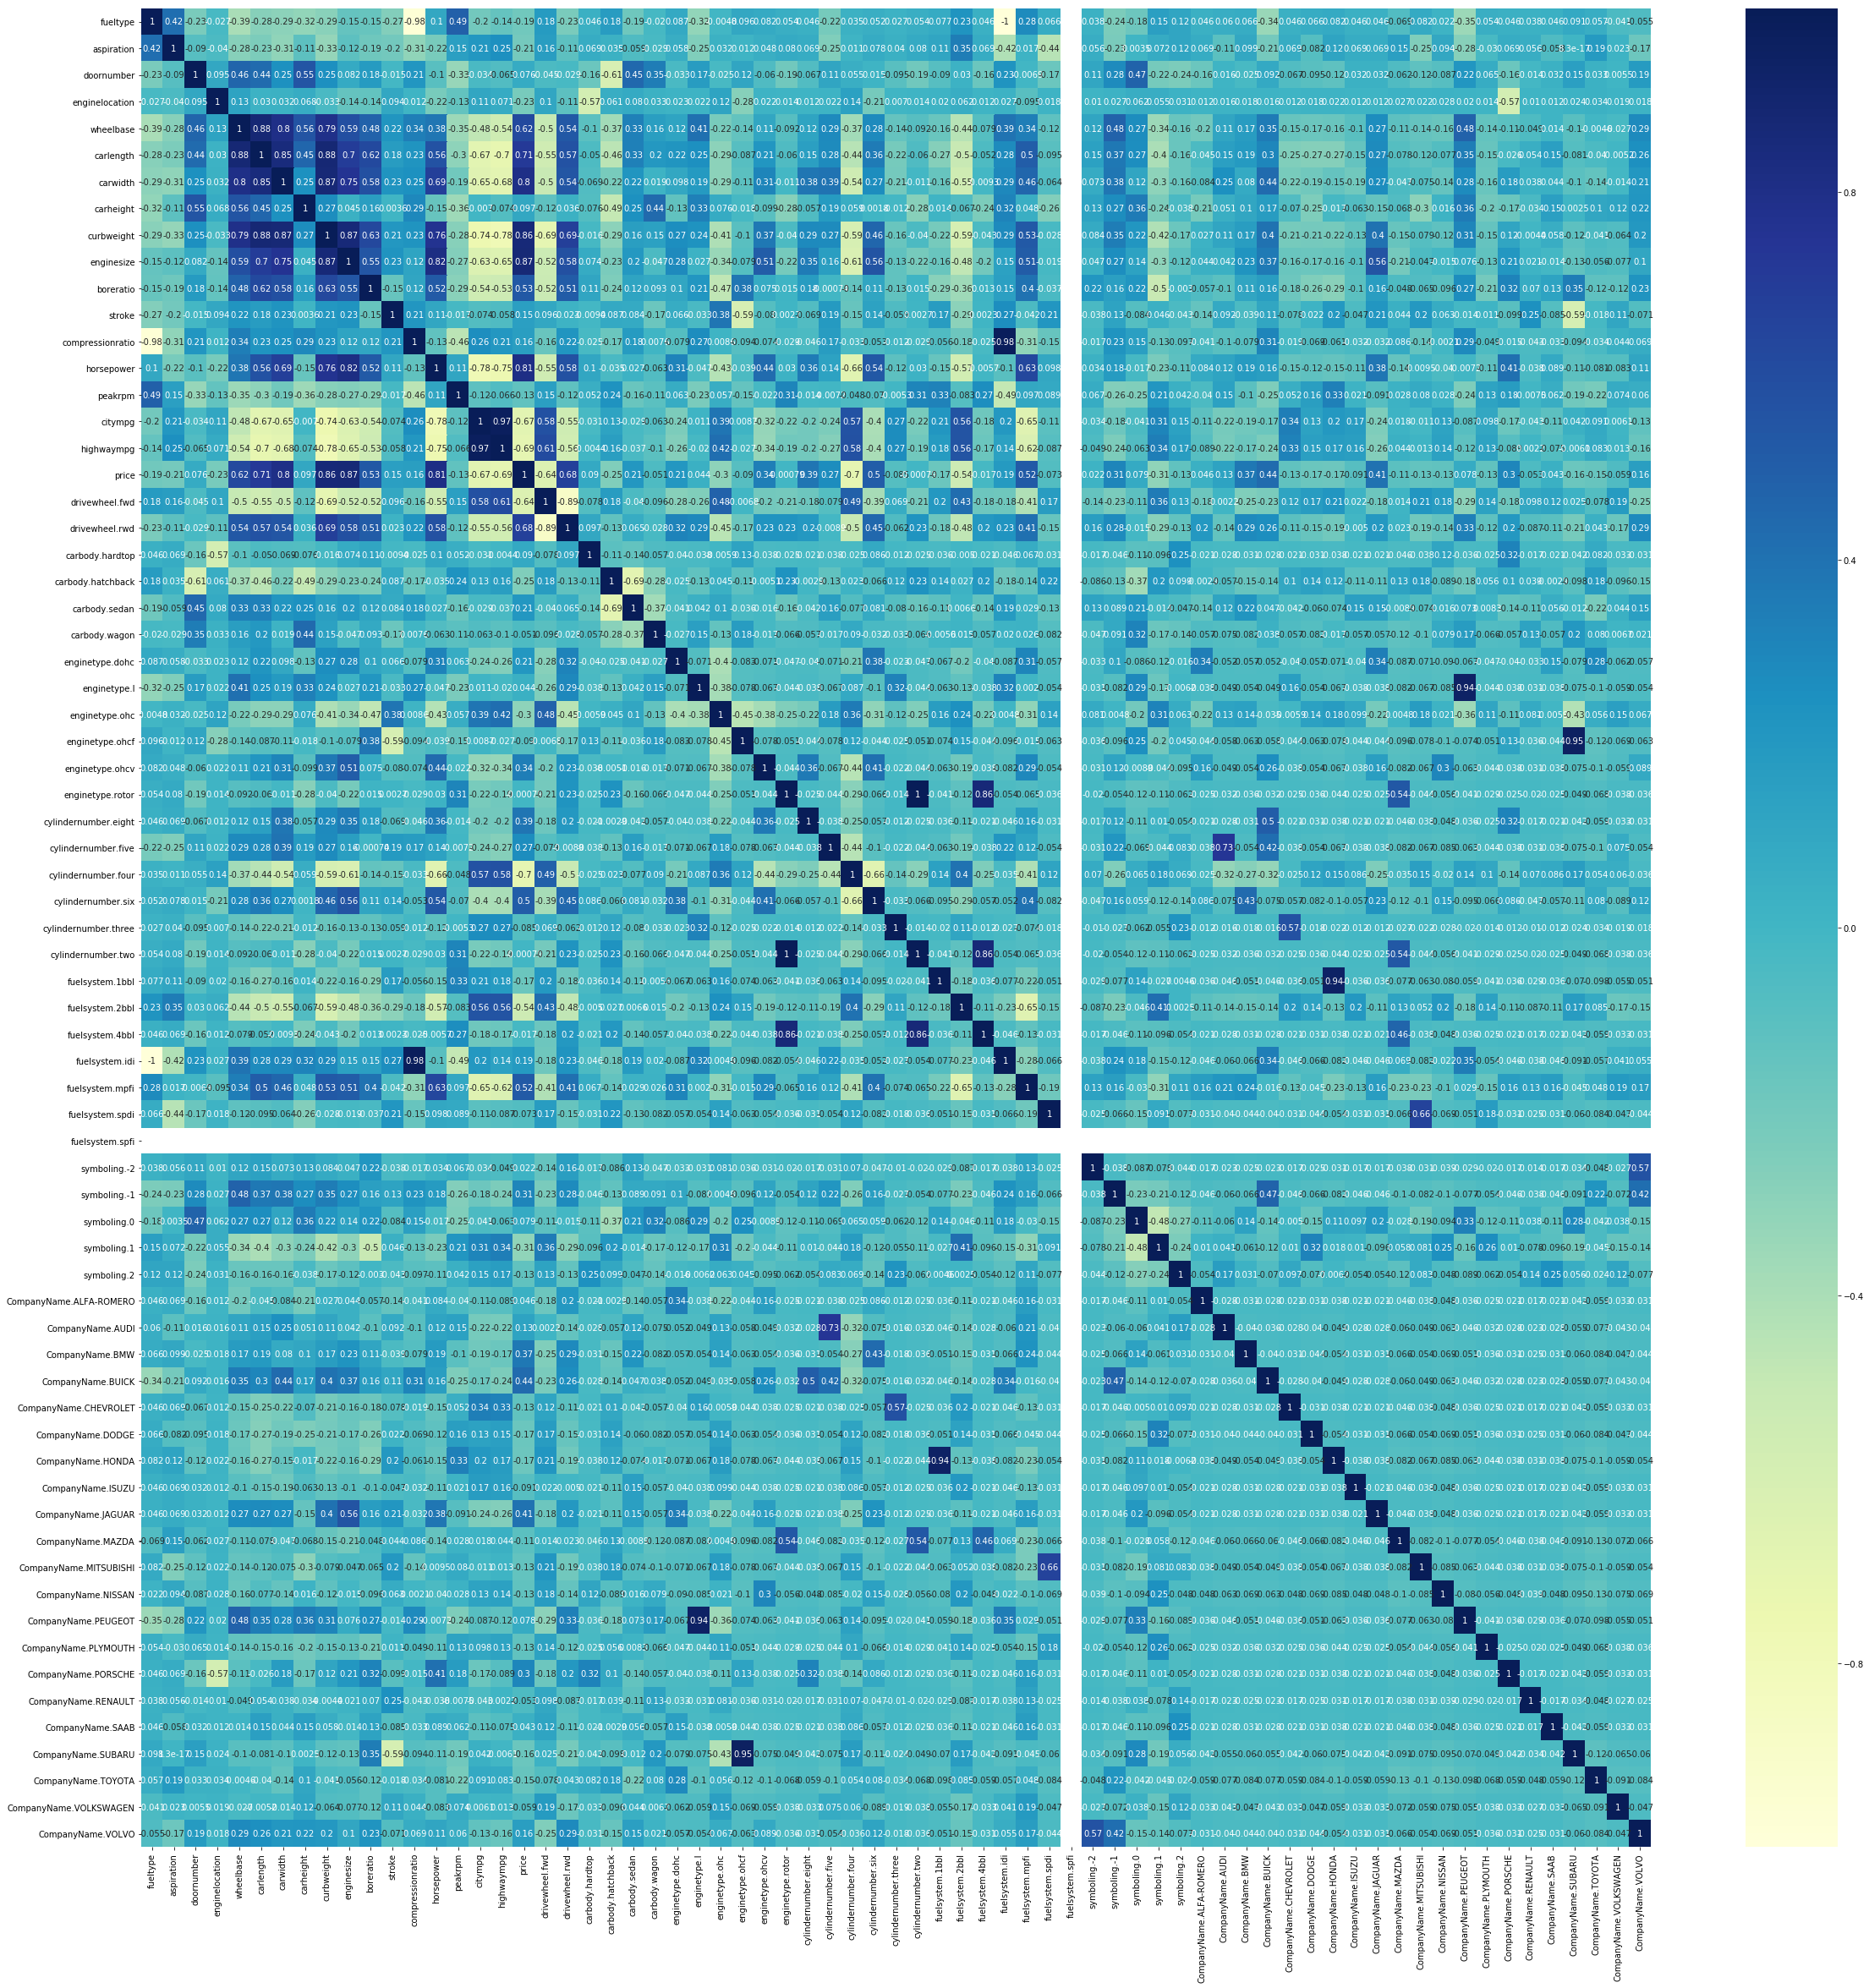

In [258]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (40,40))
sns.heatmap(car_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

From above heatmap we can see that enginesize is the one which is highly correlated with price, 0.87.

Lets find out variables using RFE which are best suitable to create our required model.

### Dividing into X and Y sets for the model building

In [259]:
y_train = car_train.pop('price')
X_train = car_train

## Building our model

We will be using RFE (Recursive feature elimination) from SciKit Learn

In [260]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [261]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [262]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('fueltype', False, 7),
 ('aspiration', False, 27),
 ('doornumber', False, 48),
 ('enginelocation', True, 1),
 ('wheelbase', False, 18),
 ('carlength', False, 15),
 ('carwidth', True, 1),
 ('carheight', False, 19),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', False, 2),
 ('compressionratio', False, 9),
 ('horsepower', False, 28),
 ('peakrpm', False, 6),
 ('citympg', False, 43),
 ('highwaympg', False, 33),
 ('drivewheel.fwd', False, 53),
 ('drivewheel.rwd', False, 47),
 ('carbody.hardtop', False, 37),
 ('carbody.hatchback', False, 35),
 ('carbody.sedan', False, 44),
 ('carbody.wagon', False, 45),
 ('enginetype.dohc', False, 26),
 ('enginetype.l', True, 1),
 ('enginetype.ohc', False, 24),
 ('enginetype.ohcf', False, 51),
 ('enginetype.ohcv', False, 22),
 ('enginetype.rotor', True, 1),
 ('cylindernumber.eight', True, 1),
 ('cylindernumber.five', True, 1),
 ('cylindernumber.four', True, 1),
 ('cylindernumber.six', True, 1),
 ('cylindernumber.thr

In [263]:
#assigning 15 variables to col,for which ref.support is true
col = X_train.columns[rfe.support_]
col

Index(['enginelocation', 'carwidth', 'curbweight', 'enginesize', 'boreratio',
       'enginetype.l', 'enginetype.rotor', 'cylindernumber.eight',
       'cylindernumber.five', 'cylindernumber.four', 'cylindernumber.six',
       'cylindernumber.three', 'cylindernumber.two', 'CompanyName.BMW',
       'CompanyName.PEUGEOT'],
      dtype='object')

In [264]:
#Variables for which re,support is false
X_train.columns[~rfe.support_]

Index(['fueltype', 'aspiration', 'doornumber', 'wheelbase', 'carlength',
       'carheight', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'drivewheel.fwd', 'drivewheel.rwd',
       'carbody.hardtop', 'carbody.hatchback', 'carbody.sedan',
       'carbody.wagon', 'enginetype.dohc', 'enginetype.ohc', 'enginetype.ohcf',
       'enginetype.ohcv', 'fuelsystem.1bbl', 'fuelsystem.2bbl',
       'fuelsystem.4bbl', 'fuelsystem.idi', 'fuelsystem.mpfi',
       'fuelsystem.spdi', 'fuelsystem.spfi', 'symboling.-2', 'symboling.-1',
       'symboling.0', 'symboling.1', 'symboling.2', 'CompanyName.ALFA-ROMERO',
       'CompanyName.AUDI', 'CompanyName.BUICK', 'CompanyName.CHEVROLET',
       'CompanyName.DODGE', 'CompanyName.HONDA', 'CompanyName.ISUZU',
       'CompanyName.JAGUAR', 'CompanyName.MAZDA', 'CompanyName.MITSUBISHI',
       'CompanyName.NISSAN', 'CompanyName.PLYMOUTH', 'CompanyName.PORSCHE',
       'CompanyName.RENAULT', 'CompanyName.SAAB', 'CompanyName

### Building model using statsmodel, for the detailed statistics

In [265]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [266]:
# Adding a constant variable because if we don't do this statsmodel fits a regression line passing through the origin, by default
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [267]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [268]:
#Let's see the summary of our linear model
print(lm.summary())


# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     122.8
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           6.14e-66
Time:                        15:46:42   Log-Likelihood:                -1298.7
No. Observations:                 143   AIC:                             2625.
Df Residuals:                     129   BIC:                             2667.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.483e+04 

,Features,VIF
6,enginetype.l,inf
7,enginetype.rotor,inf
12,cylindernumber.three,inf
13,cylindernumber.two,inf
15,CompanyName.PEUGEOT,inf
0,const,623.060000
10,cylindernumber.four,77.880000
11,cylindernumber.six,32.260000
9,cylindernumber.five,21.290000
4,enginesize,16.460000


We can see for cylindernumber.six variable VIF is high i.e.,32.260000 (which has more multicollinearity)
and p-value is 0.805(as we consider p-value >0.05 is insignificant) . So lets drop this variable

In [269]:
#Dropping cylindernumber.six variable
X_train_1 = X_train_rfe.drop(["cylindernumber.six"], axis = 1)

# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_1)

# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()  

#Let's see the summary of our linear model
print(lm.summary())



# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     134.0
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           5.35e-67
Time:                        15:46:42   Log-Likelihood:                -1298.7
No. Observations:                 143   AIC:                             2623.
Df Residuals:                     130   BIC:                             2662.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.581e+04 

,Features,VIF
6,enginetype.l,inf
7,enginetype.rotor,inf
11,cylindernumber.three,inf
12,cylindernumber.two,inf
14,CompanyName.PEUGEOT,inf
0,const,181.220000
3,curbweight,10.320000
4,enginesize,9.450000
10,cylindernumber.four,6.880000
2,carwidth,6.190000


As  we can see for enginetype.l variable p-value is less than 0.05 but VIF is very high which shouldn't be. So lets drop this variable

In [270]:
#Dropping enginetype.l variable
X_train_2 = X_train_1.drop(["enginetype.l"], axis = 1)

# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_2)

# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()  

#Let's see the summary of our linear model
print(lm.summary())



# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     134.0
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           5.35e-67
Time:                        15:46:42   Log-Likelihood:                -1298.7
No. Observations:                 143   AIC:                             2623.
Df Residuals:                     130   BIC:                             2662.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.581e+04 

,Features,VIF
6,enginetype.rotor,inf
11,cylindernumber.two,inf
0,const,181.220000
3,curbweight,10.320000
4,enginesize,9.450000
9,cylindernumber.four,6.880000
2,carwidth,6.190000
5,boreratio,2.630000
8,cylindernumber.five,2.230000
13,CompanyName.PEUGEOT,1.690000


#We can see that all the p-values are less than 0.05 but from VIF df above there are two variables whose VIF is inf means there's high multicollinearity. So lets drop enginetype.rotor first and see

In [271]:
#Dropping enginetype.rotor variable
X_train_3 = X_train_2.drop(["enginetype.rotor"], axis = 1)

# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_3)

# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()  

#Let's see the summary of our linear model
print(lm.summary())



# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     134.0
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           5.35e-67
Time:                        15:46:42   Log-Likelihood:                -1298.7
No. Observations:                 143   AIC:                             2623.
Df Residuals:                     130   BIC:                             2662.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.581e+04 

,Features,VIF
0,const,181.22
3,curbweight,10.32
4,enginesize,9.45
8,cylindernumber.four,6.88
2,carwidth,6.19
10,cylindernumber.two,2.66
5,boreratio,2.63
7,cylindernumber.five,2.23
12,CompanyName.PEUGEOT,1.69
9,cylindernumber.three,1.46


Once enginetype.rotor variable is removed, we can see no VIF values as inf.

Still, now our p-values are under 0.05 which is significant but VIF of few variables is above 5. So  lets try dropping the one with high VIF i.e.,curbweight

In [272]:
#Dropping curbweight variable
X_train_4 = X_train_3.drop(["curbweight"], axis = 1)

# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_4)

# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()  

#Let's see the summary of our linear model
print(lm.summary())



# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     117.7
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           2.81e-62
Time:                        15:46:42   Log-Likelihood:                -1313.4
No. Observations:                 143   AIC:                             2651.
Df Residuals:                     131   BIC:                             2686.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.442e+04 

,Features,VIF
0,const,179.37
3,enginesize,7.07
7,cylindernumber.four,6.61
2,carwidth,5.20
9,cylindernumber.two,2.66
4,boreratio,2.46
6,cylindernumber.five,2.23
8,cylindernumber.three,1.44
11,CompanyName.PEUGEOT,1.39
5,cylindernumber.eight,1.34


After removing curbweight, we can see that p-values changed now. So lets find a variable which has insignificant p-value and high VIF. cylindernumber.four is the one which has p-value of 0.252 and VIF = 6.61. So lets drop this variable

In [273]:
#Dropping cylindernumber.four variable
X_train_5 = X_train_4.drop(["cylindernumber.four"], axis = 1)

# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_5)

# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()  

#Let's see the summary of our linear model
print(lm.summary())



# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     129.0
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           4.62e-63
Time:                        15:46:43   Log-Likelihood:                -1314.1
No. Observations:                 143   AIC:                             2650.
Df Residuals:                     132   BIC:                             2683.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.523e+04 

,Features,VIF
0,const,167.79
2,carwidth,5.12
3,enginesize,3.60
4,boreratio,1.81
6,cylindernumber.five,1.59
10,CompanyName.PEUGEOT,1.34
5,cylindernumber.eight,1.33
8,cylindernumber.two,1.18
1,enginelocation,1.12
9,CompanyName.BMW,1.11


After removing cylindernumber.four,all VIF values are under 5 but p-value of boreratio raised to 0.710 which is insignificant.So, lets drop this variable

In [274]:
#Dropping boreratio variable
X_train_6 = X_train_5.drop(["boreratio"], axis = 1)

# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_6)

# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()  

#Let's see the summary of our linear model
print(lm.summary())



# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_6
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     144.2
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           4.00e-64
Time:                        15:46:43   Log-Likelihood:                -1314.2
No. Observations:                 143   AIC:                             2648.
Df Residuals:                     133   BIC:                             2678.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.499e+04 

,Features,VIF
0,const,158.28
2,carwidth,4.58
3,enginesize,3.53
5,cylindernumber.five,1.49
9,CompanyName.PEUGEOT,1.33
4,cylindernumber.eight,1.31
7,cylindernumber.two,1.17
8,CompanyName.BMW,1.11
1,enginelocation,1.09
6,cylindernumber.three,1.07


After dropping boreratio,CompanyName.PEUGEOT p-value is 0.248 which is insignificant. So lets drop and see this CompanyName.PEUGEOT variable

In [275]:
#Dropping CompanyName.PEUGEOT variable
X_train_7 = X_train_6.drop(["CompanyName.PEUGEOT"], axis = 1)

# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_7)

# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()  

#Let's see the summary of our linear model
print(lm.summary())



# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_7
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     161.7
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           5.93e-65
Time:                        15:46:43   Log-Likelihood:                -1314.9
No. Observations:                 143   AIC:                             2648.
Df Residuals:                     134   BIC:                             2675.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.508e+04 

,Features,VIF
0,const,158.15
2,carwidth,3.56
3,enginesize,3.23
5,cylindernumber.five,1.33
4,cylindernumber.eight,1.25
7,cylindernumber.two,1.14
8,CompanyName.BMW,1.10
1,enginelocation,1.09
6,cylindernumber.three,1.06


Now all the p-values and VIF are under 0.05 and 5 respectively which is our consideration.

We can also observe that the difference between R squared and adjusted R-squared has also become less compared to the point where we started droping variables.

Now lets look into Residual Analysis of the train data

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [276]:
y_train_price = lm.predict(X_train_lm)

Text(0.5,0,'Errors')

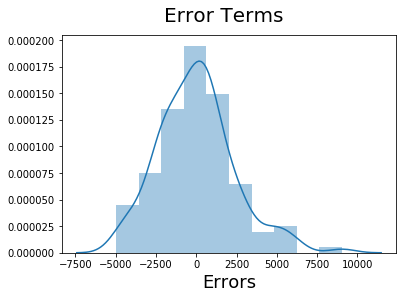

In [277]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 10)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Making Predictions


#### Applying the scaling on the test sets

In [278]:
# Apply scaler() to all the columns except'dummy' variables
num_vars = ['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']

car_test[num_vars] = scaler.fit_transform(car_test[num_vars])

#### Dividing into X_test and y_test

In [279]:
y_test = car_test.pop('price')
X_test = car_test

X_train_7 = X_train_7.drop(['const'], axis=1) #Dropping constant column from the train dataset

In [280]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_7.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [281]:
# Making predictions
y_pred = lm.predict(X_test_new)

## Model Evaluation

Text(0,0.5,'y_pred')

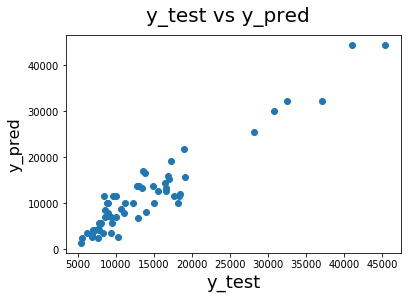

In [282]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

We can see that the equation of our best fitted line is:

$ price = -1.603e+04  \times  enginelocation + 1.431e+04  \times  carwidth + 2.659e+04 \times enginesize + 4821.88 \times cylindernumber.eight + 2586.06 \times cylindernumber.five + 6108.98 \times cylindernumber.three + 6382.88 \times cylindernumber.two + 9316.75 \times CompanyName.BMW$